<a href="https://colab.research.google.com/github/iishutov/CV-Project/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'

batch_size = 32
rescale = 1./255
img_height = img_width = 128

Found 574 images belonging to 2 classes.


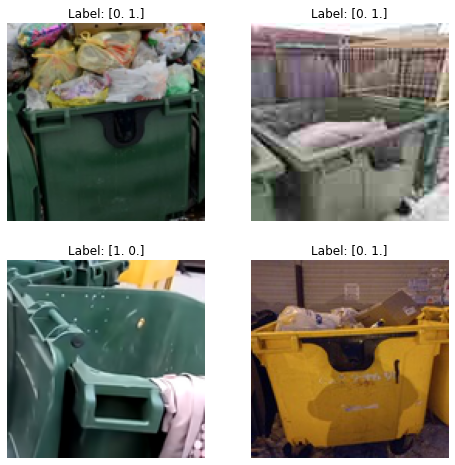

In [9]:
# Training dataset preprocessing
train_datagen = ImageDataGenerator(
    rescale=rescale,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest',
    validation_split=0.0
)

train_dataset = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
)

# Show the resulted training dataset after augmentation.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i in range(2):
    for j in range(2):
        image, label = train_dataset.next()
        axs[i,j].imshow(image[0])
        axs[i,j].set_title(f'Label: {label[0]}')
        axs[i,j].axis('off')
plt.show()

In [4]:
# ImageDataGenerator does not increase the size of the dataset.
train_dataset.n

574

In [10]:
# Building the convolutional base.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Adding Dense Layers.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

In [11]:
# Training the model.
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

history = model.fit(train_dataset, epochs = 2)

Epoch 1/10
18/18 [==============================] - 23s 1s/step - loss: 0.7026 - accuracy: 0.5889
Epoch 2/10
18/18 [==============================] - 19s 1s/step - loss: 0.5549 - accuracy: 0.7056
Epoch 3/10
18/18 [==============================] - 19s 1s/step - loss: 0.4824 - accuracy: 0.7631
Epoch 4/10
18/18 [==============================] - 20s 1s/step - loss: 0.3797 - accuracy: 0.8275
Epoch 5/10
18/18 [==============================] - 19s 1s/step - loss: 0.2864 - accuracy: 0.8850
Epoch 6/10
18/18 [==============================] - 22s 1s/step - loss: 0.2178 - accuracy: 0.9146
Epoch 7/10
18/18 [==============================] - 19s 1s/step - loss: 0.1348 - accuracy: 0.9477
Epoch 8/10
18/18 [==============================] - 20s 1s/step - loss: 0.0712 - accuracy: 0.9791
Epoch 9/10
18/18 [==============================] - 22s 1s/step - loss: 0.0618 - accuracy: 0.9808
Epoch 10/10
18/18 [==============================] - 20s 1s/step - loss: 0.0219 - accuracy: 0.9965


Found 101 images belonging to 2 classes.
21/21 [==============================] - 1s 47ms/step


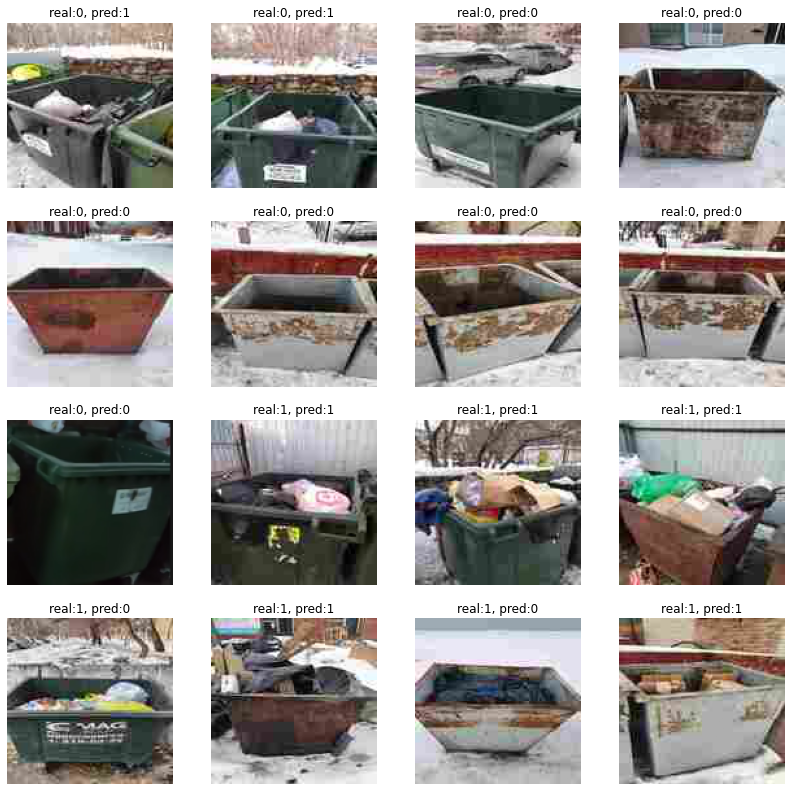

In [48]:
# Testing dataset preprocessing (normalization).
test_datagen = ImageDataGenerator(rescale=rescale)

test_dataset = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

model.evaluate(test_dataset)
predictions = model.predict(test_dataset)

idx = 0
rng = np.random.default_rng()
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,14))

for i in range(4):
  for j in range(4):
    image, label = test_dataset.next()
    batch_size = label.shape[0]
    
    local_idx = (int)(batch_size * rng.uniform())
    global_idx = (idx + local_idx) % len(predictions)

    real_class = np.argmax(label[local_idx])
    predicted_class = np.argmax(predictions[global_idx])

    axs[i,j].set_title(f'real:{real_class}, pred:{predicted_class}')
    axs[i,j].imshow(image[local_idx])
    axs[i,j].axis('off')

    idx += batch_size

plt.show()
